# Loading Outlier Detection Dataset

In [1]:
import pandas as pd

In [2]:
#from sklego.datasets import load_penguins --> source of this dataset
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


### Dropping Null Values

In [4]:
df = df.dropna()
df.isna().sum().sum() # sum of null values in our df

0

# Detecting Outliers

In [5]:
from hulearn.experimental.interactive import InteractiveCharts
charts = InteractiveCharts(df, labels="species")

Loading BokehJS ...

In [7]:
# Run this in a seperate cell
charts.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [8]:
# Run this in a seperate cell
charts.add_chart(x="flipper_length_mm", y="body_mass_g")

In [9]:
from hulearn.outlier import InteractiveOutlierDetector

model = InteractiveOutlierDetector(json_desc=charts.data())

X, y = df.drop(columns=['species']), df['species']
preds = model.fit(X, y).predict(X)

# Output Visualizations

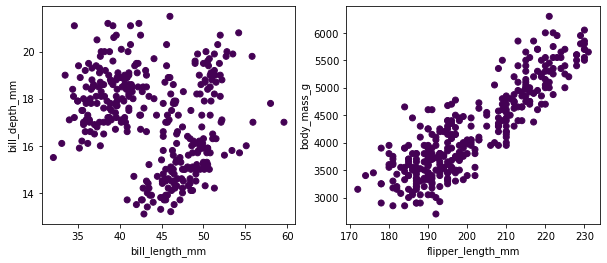

In [10]:
import matplotlib.pylab as plt

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.subplot(122)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g');

A point is considered an outlier if it does not fall inside of enough drawn polygons. The number of poylgons that a point must fall into is a parameter that you can set manually or even search for in a grid-search.

In [15]:
# point is in atleast one polygon, if threshold == 1 and in atleast 2 polygons if threshold == 2.
model = InteractiveOutlierDetector(json_desc=charts.data(), threshold=2)
X, y = df.drop(columns=['species']), df['species']
preds = model.fit(X, y).predict(X)

# Output Visualizations

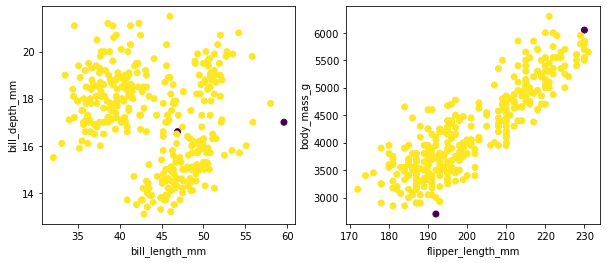

In [16]:
import matplotlib.pylab as plt

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.subplot(122)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g');

# Reference

https://koaning.github.io/human-learn/guide/finding-outliers/outliers.html#how-it-works